In [222]:
import copy  # for deepcopy
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np  
import numpy as np
import random
import math
from collections import Counter
import itertools
from pprint import pprint
import json
from datetime import timedelta, date
from dateutil import rrule
from datetime import datetime, timedelta
import datetime
import time
#from  random import *
import simpy
#from config import *
import networkx as nx
from itertools import islice
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from collections import Counter


from datetime import datetime
import networkx as nx
import math
from itertools import islice
import pandas as pd
import warnings
import time
import yaml
import pprint
import json
from functools import reduce
import operator

In [223]:
NO_OF_SLOT=[1,2,3,4]
RANDOM_SEED = [50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340]
MAX_TIME = 10000000  
DEMAND_SLOT_QPSK=[1,2,3,4]
dem_slot=[2,3,4,5]
DEMAND_TYPE = [1,2,3,4]
TOPOLOGY = 'dutch_telecom'
HOLDING_TIME = 2.0
SLOTS = 360
SLOT_SIZE = 12.5
N_PATH = 1

In [224]:
nodes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13]
nodePair={}
for i in nodes:
  for j in nodes:
    if i!=j:
      nodePair[i,j]=None

In [225]:
dates = pd.date_range(start ='10-1-2021', end ='12-31-2021', freq ='D')

In [226]:
pattern_dict={}

p11=random.randint(4, 7)
p12=random.randint(1,3)
p13=random.randint(0,2)
p14=random.randint(0,2)

for hr in range(0,24):
  hour_dict={}
  for pair in nodePair:
    if (hr>=0 and hr <=6):
      p11=random.randint(4, 6)
      p12=random.randint(1,2)
      p13=random.randint(0,2)
      p14=random.randint(0,2)
      hour_dict[pair]=[p11,p12,p13,p14]
      pattern_dict[hr]=hour_dict

    elif(hr>=7 and hr <=12):
      p11=random.randint(0,3)
      p12=random.randint(4,5)
      p13=random.randint(4,5)
      p14=random.randint(0,2)
      hour_dict[pair]=[p11,p12,p13,p14]
      pattern_dict[hr]=hour_dict

    elif(hr>=13 and hr <=18):
      p11=random.randint(0,2)
      p12=random.randint(4,5)
      p13=random.randint(4,5)
      p14=random.randint(0,3)
      hour_dict[pair]=[p11,p12,p13,p14]
      pattern_dict[hr]=hour_dict

    else:
      p11=random.randint(0,2)
      p12=random.randint(0,2)
      p13=random.randint(1,3)
      p14=random.randint(4,6)
      hour_dict[pair]=[p11,p12,p13,p14]
      pattern_dict[hr]=hour_dict 

In [227]:
df_pattern=pd.DataFrame.from_dict(pattern_dict,orient='index')


In [228]:
# x axis values
x = np.arange(1,25,1)
# corresponding y axis values
normalized_load_at_t = [0.4,0.33,0.3,0.275,0.27,0.362,0.51,0.66,0.695,0.737,0.745,0.725,0.766,0.77,0.737,0.75,0.755,0.775,0.862,0.962,1,0.912,0.725,0.537]
# # plotting the points 
# plt.plot(x, normalized_load_at_t,marker = 'o')
# # naming the x axis
# plt.xlabel('Hour')
# # naming the y axis
# plt.ylabel('Normalized Traffic load')
# plt.title('One day traffic load')
# plt.yticks(np.arange(0.2,1,.05))
# plt.xticks(np.arange(1,25,1))
# plt.grid()
# # function to show the plot
# plt.show()

In [229]:
XnodePairs={}
nodes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13]
for i in nodes:
  for j in nodes:
    if i!=j:
      XnodePairs[i,j]=np.random.randint(30, 170)

In [230]:
def genHourlyLoadPerPair(hr):
  #x=random.uniform(4.0,5.0)
  load_per_nodePair={}
  rate_per_od_pair={}
  for key in XnodePairs:
    at=normalized_load_at_t[hr]
    LOD_t=at*XnodePairs[key]*(1+(random.uniform(-0.1, 0.1)))
    temp=math.floor(LOD_t)
    load_per_nodePair[key]=temp
    hr_rate=math.ceil(temp/HOLDING_TIME)
    rate_per_od_pair[key]=hr_rate
  return [load_per_nodePair,rate_per_od_pair]

In [231]:
dates = pd.date_range(start ='10-1-2021', end ='10-31-2021', freq ='D')

In [232]:
dateList=[]
for day in dates:
  year = '{:02d}'.format(day.year)
  month = '{:02d}'.format(day.month)
  day = '{:02d}'.format(day.day)
  date= '{}-{}-{}'.format(year, month, day)
  #print(date)
  dateList.append(date)

In [233]:
hourlyPair_rate={}
hourlyPair_Load={}
for date in dateList:
  hourlyRate={}
  hourlyLoad={}
  for hr in range(0,24):
    hourly_load_per_pair,hourly_rate_per_pair=genHourlyLoadPerPair(hr)
    hourlyRate[hr]=hourly_rate_per_pair
    hourlyLoad[hr]=hourly_load_per_pair
    hourlyPair_rate[date]=hourlyRate
    hourlyPair_Load[date]=hourlyLoad

In [234]:
first_hr=hourlyPair_rate['2021-10-01'][0]
req_pattern=df_pattern.iloc[0]
#print(req_pattern)
final_dem={}
#print(type(first_hr))
for key in first_hr:
    pair={}
    src=key[0]
    dst=key[1]
    #print("Src:",src,"Dst: ",dst)
    noReq=first_hr[key]
    dem_pattern=req_pattern[key]
    #print(noReq, sum(dem_pattern))
    x=(noReq/sum(dem_pattern))
    #print(noReq, sum(dem_pattern), x)
    d1=math.floor(x*dem_pattern[0])
    d2=math.floor(x*dem_pattern[1])
    d3=math.floor(x*dem_pattern[2])
    d4=math.floor(x*dem_pattern[3])
    #print(d1,d2,d3,d4)
    pair_demand=[2]*d1+[3]*d2+[4]*d3+[5]*d4
    #print(pair_demand)
    final_dem[key]=pair_demand
    #extra=random.sample(NO_OF_SLOT,k=y)
    #FinalDem=demand+extra
    #print(FinalDem)

In [235]:
# #first_hr=hourlyPair_rate['2021-10-01'][0]
# #req_pattern=df_pattern.iloc[0]
# #print(req_pattern)
# #final_dem={}

# pair_dem_pattern_final={} #contains the day-hour-pair wise dem sequence [2,2,2,3,3,4,4,5,5]
# for day in dateList:
#   hourly_pair_dem_pattern={}
#   hourly_all_pair_dem_seq={}
  
#   for hr in range(0,24):
#     hourly_pair_dem_pattern={}

#     #src=key[0]
#     #dst=key[1]
#     #print("Src:",src,"Dst: ",dst)
#     this_hr_req_counts=hourlyPair_rate[day][hr]
#     pair_hourly_req_pattern=df_pattern.iloc[hr]
#     #print(this_hr_req_counts)
#     for pair in this_hr_req_counts:
#       pair_dem_count=this_hr_req_counts[pair]
#       #print(pair,pair_dem_count)
      
#       #print(pair_hourly_req_pattern)

#       pair_dem_pattern=pair_hourly_req_pattern[pair]
#       #print(pair_dem_pattern)
#       x=(pair_dem_count/sum(pair_dem_pattern))
#       #print(x)
#       d1=math.floor(x*pair_dem_pattern[0])
#       d2=math.floor(x*pair_dem_pattern[1])
#       d3=math.floor(x*pair_dem_pattern[2])
#       d4=math.floor(x*pair_dem_pattern[3])

#       temp=[d1,d2,d3,d4]
#       pair_dem_seq=[1]*d1+[2]*d2+[3]*d3+[4]*d4
#       hourly_pair_dem_pattern[pair]=pair_dem_seq
#       hourly_all_pair_dem_seq[hr]=hourly_pair_dem_pattern
#       pair_dem_pattern_final[day]=hourly_all_pair_dem_seq
# #print(no_request)



In [236]:
import pickle 

# with open('pair_dem_pattern_final.pkl', 'wb') as f:
#     pickle.dump(pair_dem_pattern_final, f)
        
with open('pair_dem_pattern_final.pkl', 'rb') as f:
    pair_dem_pattern_final = pickle.load(f)

In [237]:
def closestMultiple(n, x):
    if x > n:
      return x
    if x % n == 0:
      return x
    z = (int)(n / x)
    #print(x)
    m = z*x
    return m

In [238]:
#pair_dem_pattern_final
def getNextHourPartition(date,hr):
  x=0
  p1=[]
  p2=[]
  p3=[]
  p4=[]
  for x in range(0,14):
    for y in range(0,14):
      if x!=y:
        c=Counter(pair_dem_pattern_final[date][hr][x,y])
        t1=c[1]
        t2=c[2]
        t3=c[3]
        t4=c[4]
        p1.append(t1)
        p2.append(t2)
        p3.append(t3)
        p4.append(t4)
  #print("Type1:",sum(p1))
  #print("Type2:",sum(p2))
  #print("Type3:",sum(p3))
  #print("Type4:",sum(p4))
  tot_req=sum(p1)+sum(p2)+sum(p3)+sum(p4)
  #print("Total request:=",tot_req)
  proportion=round(360/tot_req,5)
  #print("Proportion",proportion)

  t1_slot=int(sum(p1)*proportion)
  t2_slot=int(sum(p2)*proportion)
  t3_slot=int(sum(p3)*proportion)
  t4_slot=int(sum(p4)*proportion)


  t1=closestMultiple(t1_slot,2)
  t2=closestMultiple(t2_slot,3)
  t3=closestMultiple(t3_slot,4)
  t4=closestMultiple(t4_slot,5)

  #print("Total slot:",t1+t2+t3+t4)

  #print("Type1 Slots:",t1_slot,t1)
  #print("Type2 Slots:",t2_slot,t2)
  #print("Type3 Slots:",t3_slot,t3)
  #print("Type4 Slots:",t4_slot,t4)
  
  return [t1,t2,t3,t4]



In [239]:
# G = nx.complete_graph(5)
# nx.draw(G)

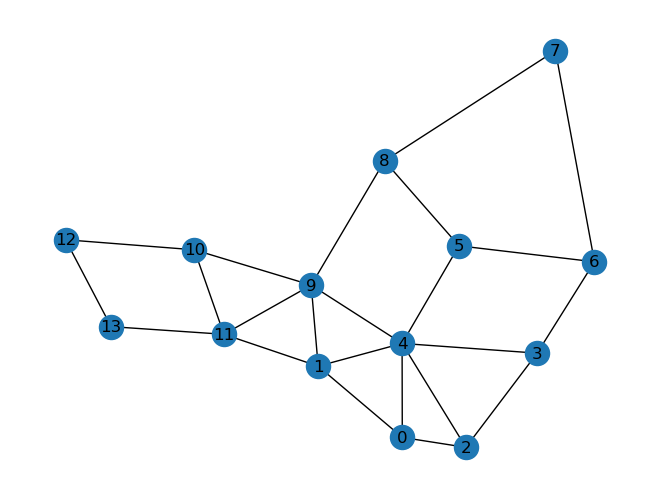

In [240]:
topology2 = nx.read_weighted_edgelist('topology/' + TOPOLOGY, nodetype=int)
topology = nx.read_weighted_edgelist('topology/' + TOPOLOGY, nodetype=int)
nx.draw(topology,with_labels=True)


In [241]:
edge_id={
	(0, 1):{"id":'A'},
	(0,2):{"id":'B'},
	(0, 4):{"id":'C'},
	(1, 4):{"id":'D'},
	(1, 9):{"id":'E'},
	(1, 11):{"id":'F'},
	(2, 3):{"id":'G'},
	(2, 4):{"id":'H'},
	(3, 4):{"id":'I'},
	(3, 6):{"id":'J'},
	(4, 5):{"id":'K'},
	(4, 9):{"id":'L'},
	(5, 6):{"id":'M'},
	(5, 8):{"id":'N'},
	(6, 7):{"id":'O'},
	(7, 8):{"id":'P'},
	(8, 9):{"id":'Q'},
	(9, 10):{"id":'R'},
	(9, 11):{"id":'S'},
	(10, 11):{"id":'T'},
	(10, 12):{"id":'U'},
	(11, 13):{"id":'V'},
	(12, 13):{"id":'W'},
}

In [242]:
nx.set_edge_attributes(topology2, edge_id)
nx.set_edge_attributes(topology, edge_id)
print(topology2)

Graph with 14 nodes and 23 edges


In [243]:
print(sum(dem_slot))
M=math.floor(SLOTS/sum(dem_slot))
print(M)
PARTITION_SIZES=[]
for i in range(len(dem_slot)):
  PARTITION_SIZES.append(M*dem_slot[i])
PARTITION_SIZES[3]=135
PARTITION_SIZES

14
25


[50, 75, 100, 135]

In [244]:
def listmaker(key,n):
  listofpair = [key] * n
  return listofpair

In [245]:
def genRequest(rate_per_pair):
  req=[]
  for key in rate_per_pair:
    #print(key)
    n=rate_per_pair[key]
    occur=listmaker(key,n)
    req.append(occur)
  req=(list(itertools.chain.from_iterable(req)))
  random.shuffle(req)
  return req

In [246]:
#Deallocate spectrum after the expiary of holtding time
class Deallocate(object):
	def __init__(self, env):
		self.env = env
	def Run(self, count, path, spectrum, holding_time,partition):
		global topology
		yield self.env.timeout(holding_time)
		for i in range(0, (len(path)-1)):
			for slot in range(spectrum[0],spectrum[1]+1):
				topology[path[i]][path[i+1]][partition][slot] = 0

In [247]:
partition_info={ 
    'd1':[0,4], #5 slots [0,1,2,3,4]
    'd2':[5,14], # 10 slot [5,6,7,8,9,10,11,12,13,14]
    'd3':[15,29], #15 slots [15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]
    'd4':[30,59]  #30 slots
}

In [248]:
class Simulador(object):
	def __init__(self, env):
		self.env = env
		global topology
		global topology2
		demand_dict={}


		self.nodes = list(topology.nodes())
		self.random = random.Random()
		self.NumReqBlocked = 0 
		self.cont_req = 0
		self.k_paths = {}
		self.DemandT1=0
		self.DemandT2=0
		self.DemandT3=0
		self.DemandT4=0
		self.DemandT1_Blocked=0
		self.DemandT2_Blocked=0
		self.DemandT3_Blocked=0
		self.DemandT4_Blocked=0
		self.LeftReq=0

		self.slot_usage_count={}
		self.tot_holding_time=0

		self.all_neighboring_links={}

	def Run(self, rate,demand_seq,day,hr,next_slot_dem,iter_dem_pair):
		global topology
		global topology2

		for u, v in list(topology.edges):
			topology[u][v]['d1'] = [0] * next_slot_dem[0]
			topology[u][v]['d2'] = [0] * next_slot_dem[1]
			topology[u][v]['d3'] = [0] * next_slot_dem[2]
			topology[u][v]['d4'] = [0] * next_slot_dem[3]

			self.slot_usage_count[topology2[u][v]['id']]=[0]*4

		for i in list(topology.nodes()):
			for j in list(topology.nodes()):
				if i!= j:
					self.k_paths[i,j] = self.k_shortest_paths(topology, i, j, N_PATH, weight='weight')

		#precompute all the neighboring links of all the paths in the network
		self.all_neighboring_links = self.find_neighboring_links_of_all_paths()
		#print(self.all_neighboring_links)
    
		for count in range((len(demand_seq))):
			yield self.env.timeout(self.random.expovariate(rate))
			#print("-----------------------------------------------")
			src=demand_seq[count][0]
			dst=demand_seq[count][1]
			#print(src,dst)
			bandwidth = self.getBW(src,dst)
			if(bandwidth==0):
				self.LeftReq+=1
				#print("List Empty")
				continue
			demand_type=self.Demand_Type(bandwidth)
			holding_time = self.random.expovariate(HOLDING_TIME)
			self.Count_Demand_Type(demand_type)
			paths = self.k_paths[src,dst]

			flag = 0
			for i in range(N_PATH):
				num_slots=self.Calculte_Num_Slot(demand_type)
				#print("Num Slots:",num_slots)
				free_block=self.PathIsAble_free_blocks(num_slots,paths[i],demand_type)
				#print("Path: ",paths[i])
				if free_block: # free_block has some items

					#print("Free Blocks: ",free_block)
					n_links = self.all_neighboring_links[tuple(paths[i])]
					occupied_block_on_neighborLink=self.check_common_occupied_blocks_block_key(free_block,n_links,demand_type)
					#print(occupied_block_on_neighborLink)

					if(occupied_block_on_neighborLink=={}):
						spectrum_block=[free_block[0][0],free_block[0][1]]
						self.cont_req += 1
						self.FirstFreeFit(count,spectrum_block[0],spectrum_block[1],paths[i],demand_type,holding_time)
						deallocate = Deallocate(self.env) #call Deaalocate Function
						self.env.process(deallocate.Run(count,paths[i],spectrum_block,holding_time,demand_type)) #start the deallocation process with timeout=holding_time Run(connectionID,path[10,3,1,2],[startSlotIndex,EndSlotIndex],holding_time)
						flag = 1 #connection established
						#print("Connection established on First free block ")
						break
					else:
						best_block=self.find_best_block_for_allocation(occupied_block_on_neighborLink,holding_time)
						spectrum_block=[best_block[0],best_block[1]]
						self.cont_req +=1
						self.FirstFreeFit(count,spectrum_block[0],spectrum_block[1],paths[i],demand_type,holding_time)
						deallocate=Deallocate(self.env) #call Deaalocate Function
						self.env.process(deallocate.Run(count,paths[i],spectrum_block,holding_time,demand_type))
						flag=1
						#print("Connection established on best block")
						break
				#else:
					#print("No free block found!")
				

			if flag == 0:
					#print("Connection Blocked")
					self.NumReqBlocked +=1
					# self.Count_Demand_Type_Blocked(demand_type)

		 
	
	
	def find_neighboring_links_of_a_path(self,path):
		global topology
		neighboring_links = set()
		path_edges = set(zip(path, path[1:]))  # Create a set of edges that are part of the path
		# Iterate through each node in the path
		for node_id in path:
			for neighbor in topology.neighbors(node_id):
				if (node_id, neighbor) not in path_edges and (neighbor, node_id) not in path_edges:
					neighboring_links.add((node_id, neighbor))
					neighboring_links.add((neighbor, node_id))
		# Remove any links that directly connect nodes in the path
		for edge in path_edges:
			neighboring_links.discard(edge)
			neighboring_links.discard((edge[1], edge[0]))  # Remove reverse direction if added
		unique_links = [tuple(sorted(set(link))) for link in neighboring_links]
		unique_links = list(set(unique_links))
		return unique_links

	def find_neighboring_links_of_all_paths(self):
		global topology
		neighborLinks = {}  # Dictionary to store neighboring links of all possible paths
		for path_key, path in self.k_paths.items():
			converted_list = [item for sublist in path for item in sublist]
			#print(converted_list)
			neighboring_links = self.find_neighboring_links_of_a_path(converted_list)
			neighborLinks[tuple(converted_list)] = neighboring_links  # Convert path_key to tuple
		return neighborLinks
	
	# #find free blocks on selected path [0,2,3]
	# def PathIsAble_free_blocks(self,nslots, path, partition):
	# 	global topology
	
	# 	free_blocks = []  # List to store the start and end of each non-overlapping free block of size nslots
	# 	slot = 0
	# 	while slot < len(topology[path[0]][path[1]][partition]):
	# 		if topology[path[0]][path[1]][partition][slot] == 0:
	# 			if all(topology[path[ind]][path[ind+1]][partition][slot] == 0 for ind in range(len(path)-1)):
	# 				block_start = slot
	# 				while slot < len(topology[path[0]][path[1]][partition]) and all(topology[path[ind]][path[ind+1]][partition][slot] == 0 for ind in range(len(path)-1)):
	# 						slot += 1
	# 				block_end = slot - 1  # slot is now one past the end of the free block
	# 				if block_end - block_start + 1 >= nslots:
	# 					free_blocks.append((block_start, block_start + nslots - 1))
	# 					slot = block_start + nslots
	# 					continue
	# 				else:
	# 					slot = block_end + 1
	# 					continue
	# 			else:
	# 					slot += 1  # Move to the next slot if the current slot is not free across the entire path
	# 		else:
	# 				slot += 1  # Move to the next slot if the current slot is not free
	# 	return free_blocks
	
	def PathIsAble_free_blocks(self, nslots, path, partition):
		global topology
		
		free_blocks = []  # List to store the start and end of each non-overlapping free block of size nslots
		slot = 0
		max_slot = len(topology[path[0]][path[1]][partition])  # Precompute the maximum slot index
		while slot < max_slot:
			if all(topology[path[ind]][path[ind+1]][partition][slot] == 0 for ind in range(len(path)-1)):
				# Check if the current slot is free across the entire path
				block_start = slot
				while slot < max_slot and all(topology[path[ind]][path[ind+1]][partition][slot] == 0 for ind in range(len(path)-1)):
					slot += 1
				block_end = slot - 1  # slot is now one past the end of the free block
				if block_end - block_start + 1 >= nslots:
					# Check if the free block is large enough for nslots
					free_blocks.append((block_start, block_start + nslots - 1))
				# No need to continue searching if the current block is not large enough
			else:
				slot += 1  # Move to the next slot if the current slot is not free across the entire path
		return free_blocks

	# def check_common_occupied_blocks_block_key(self,free_blocks,neighbor_links,partition):
	# 	global topology
	# 	#print("called")
	# 	#neighboring_links = self.find_neighboring_links_of_patha(path)
	# 	occupied_blocks = {}
	# 	for block in free_blocks:
	# 		block_start, block_end = block
	# 		for link in neighbor_links:
	# 			for slot in range(block_start, block_end + 1):
	# 				release_time = topology[link[0]][link[1]][partition][slot]
	# 				if release_time != 0:  # Slot is occupied
	# 					release_time=release_time[1]

	# 					block_key = (block_start, block_end)  # Use both start and end as the key
	# 					if block_key not in occupied_blocks:
	# 						occupied_blocks[block_key] = {link: [release_time]}
	# 					else:
	# 						if link in occupied_blocks[block_key]:
	# 							if release_time not in occupied_blocks[block_key][link]:
	# 								occupied_blocks[block_key][link].append(release_time)
	# 							else:
	# 								occupied_blocks[block_key][link] = [release_time]
	# 	sorted_occupied_blocks = dict(sorted(occupied_blocks.items(), key=lambda item: len(item[1]), reverse=True))
	# 	return sorted_occupied_blocks
	
	def check_common_occupied_blocks_block_key(self, free_blocks, neighbor_links, partition):
		global topology

		occupied_blocks = {}

		for block in free_blocks:
			block_start, block_end = block
			block_key = (block_start, block_end)  # Use both start and end as the key

			for link in neighbor_links:
				for slot in range(block_start, block_end + 1):
					release_time = topology[link[0]][link[1]][partition][slot]

					if release_time != 0:  # Slot is occupied
						release_time = release_time[1]

						if block_key not in occupied_blocks:
							occupied_blocks[block_key] = {link: {release_time}}
						else:
							if link not in occupied_blocks[block_key]:
								occupied_blocks[block_key][link] = {release_time}
							else:
								occupied_blocks[block_key][link].add(release_time)

		sorted_occupied_blocks = dict(sorted(occupied_blocks.items(), key=lambda item: len(item[1]), reverse=True))
		return sorted_occupied_blocks


	# def find_best_block_for_allocation(self,occupied_block_on_neighborLink, ht):
	# 	# free_block=self.PathIsAble_all_free_blocks(self,n_slots,path)
	# 	# occupied_blocks1 = self.check_common_occupied_blocks_block_key(self,path,free_block)
	# 	# occupied_blocks1
	# 	data=[]
	# 	#current_r_rtime=1711295336.4448383
	# 	current_r_rtime=time.time()+ht
	# 	for block_key in occupied_block_on_neighborLink:
	# 		rt_list=reduce(operator.concat, list(occupied_block_on_neighborLink[block_key].values()))
	# 		rt_list.append(current_r_rtime)
	# 		num_link=len(rt_list)
	# 		variance = np.var(rt_list) if rt_list else 0
	# 		data.append([block_key, rt_list,variance,num_link])
	# 	variance_weight = 0.7
	# 	link_count_weight = 0.3
	# 	# Initialize variables to track the best list found
	# 	best_list = None
	# 	best_score = float('inf')  # Initialize with infinity to ensure first list is selected
	# 	# Iterate through the data
	# 	for block_key,lst, variance, link_count in data:
	# 		score = variance_weight * variance - link_count_weight * link_count
	# 		if score < best_score:
	# 			best_list = lst
	# 			best_score = score
	# 			b_key=block_key
	# 	return b_key

	def find_best_block_for_allocation(self, occupied_block_on_neighborLink, ht):
		# Calculate current relative release time
		current_r_rtime = time.time() + ht
		
		# Initialize data list
		data = []
		
		# Iterate over occupied blocks on neighbor links
		for block_key in occupied_block_on_neighborLink:
			# Combine all release times into a single list
			rt_list = [release_time for link_releases in occupied_block_on_neighborLink[block_key].values() for release_time in link_releases]
			rt_list.append(current_r_rtime)  # Append current relative release time
			num_link = len(rt_list)
			variance = np.var(rt_list) if rt_list else 0
			data.append([block_key, rt_list, variance, num_link])
		
		variance_weight = 0.9
		link_count_weight = 0.1
		
		# Initialize variables to track the best block found
		best_block_key = None
		best_score = float('inf')  # Initialize with infinity to ensure first block is selected
		
		# Iterate through the data
		for block_key, _, variance, link_count in data:
			score = variance_weight * variance - link_count_weight * link_count
			if score < best_score:
				best_block_key = block_key
				best_score = score
		
		return best_block_key

	

	#  #Perform spectrum allocation on best block
	# def FirstFreeFit(self,count,i,j,path,partition,ht): #FirstFit(connectionID, startSlotIndex, endSlotIndex, [10,3,1,2])
	# 	global topology
	# 	beginning = i #startSlotIndex
	# 	end =j #endSlotIndex
	# 	relese_time=time.time()+ht
	# 	#print(relese_time)
	# 	for i in range(0,len(path)-1): #for i in range(0, path_len-1) i.e for all the links in the path
	# 		for slot in range(beginning,end): # for slot in (startSlotIndex,endSlotIndex)
	# 			#print(slot)
	# 			#topology[path[i]][path[i+1]]['capacity'][slot] = count #mark each slot with the connectionID
	# 			topology[path[i]][path[i+1]][partition][slot] = (count,relese_time)
	# 		#print(topology[path[i]][path[i+1]]['capacity'][slot])
	# 		#topology[path[i]][path[i+1]]['capacity'][end] = ('GB',relese_time)#'GB' #mark last slot in each link with 'GB' GuardBand
	
	def FirstFreeFit(self, count, i, j, path, partition, ht):
		global topology
		
		beginning = i  # Start slot index
		end = j  # End slot index
		release_time = time.time() + ht

		# Iterate over each link in the path
		for k in range(len(path) - 1):
			link_start = path[k]
			link_end = path[k + 1]
			
			# Iterate over each slot in the range [beginning, end)
			for slot in range(beginning, end):
				# Assign the connection ID and release time to the slot on the current link
				topology[link_start][link_end][partition][slot] = (count, release_time)


	def getBW(self,  src, dst):
		list_len=len(iter_dem_pair[src,dst])
		if(list_len):
			bw=(iter_dem_pair[src,dst]).pop(random.randrange(list_len))
			return bw
		else:
			return 0
		 


	#Calculates the k-shortest paths between o-d pairs
	def k_shortest_paths(self,G, source, target, k, weight='weight'):
		return list(islice(nx.shortest_simple_paths(G, source, target, weight=weight), k))
	
	#Identify the demand type based on the bandwidth
	def Demand_Type(self, bandwidth):
		if bandwidth==1:
			return 'd1'
		elif bandwidth==2:
			return 'd2'
		elif bandwidth==3:
			return 'd3'
		else:
			return 'd4'
		
	#compute no of slot required for each demand type using QPSk Modulation Scheme
	def Calculte_Num_Slot(self,demand):
		if demand=='d1':
			num_slots=2
		elif demand=='d2':
			num_slots=3
		elif demand=='d3':
			num_slots=4
		else:
			num_slots=5
		return num_slots

	#Count total no of requested demands for each type
	def Count_Demand_Type(self,demand):
		if demand=='d1':
			self.DemandT1+=1
		elif demand=='d2':
			self.DemandT2+=1
		elif demand=='d3':
			self.DemandT3+=1
		else:
			self.DemandT4+=1

	#Count total no of Blocked request for each demand type
	def Count_Demand_Type_Blocked(self,demand):
		if demand=='d1':
			self.DemandT1_Blocked+=1
		elif demand=='d2':
			self.DemandT2_Blocked+=1
		elif demand=='d3':
			self.DemandT3_Blocked+=1
		else:
			self.DemandT4_Blocked+=1


In [249]:
Blocking={}
Blocking_Porb=pd.DataFrame()
Block_df=pd.DataFrame()

t1_block_dict={}
t2_block_dict={}
t3_block_dict={}
t4_block_dict={}
overall_block_dict={}
overall_holding_time={}
overall_stur={}
overall_hourly_partition={}
tot_req={}

for day  in dateList: #for erlan in range(erlang_min, erlang max+1, erlang_increment)
  hr_block={}
  t1_hr_block={}  #type1 hourly blocking
  t2_hr_block={}  #type2 hourly blocking
  t3_hr_block={}  #type3 hourly blocking
  t4_hr_block={}  #type4 hourly blocking
  hourly_stur={}  #hourly spectrum time slot utilization
  hourly_holdin_time={}

  daily_hourly_partition={} # to store the hourly partition size
  hr_req={}
 
  for hr in range(24):
    #for iter in range(10):
    current_hr_pair_rate=hourlyPair_rate[day][hr]
    current_hr_pair_load=hourlyPair_Load[day][hr]
    rate=sum(current_hr_pair_rate.values())
    load=sum(current_hr_pair_load.values())

    demand_seq=genRequest(current_hr_pair_rate)
    iter_dem_pair=copy.deepcopy(pair_dem_pattern_final[day][hr]) 
    next_slot_dem=getNextHourPartition(day,hr)
    daily_hourly_partition[hr]=next_slot_dem
    overall_hourly_partition[day]=daily_hourly_partition
  
    random.seed(RANDOM_SEED[hr])
    env = simpy.Environment()
    simulador = Simulador(env)
    env.process(simulador.Run(rate,demand_seq, day, hr,next_slot_dem,iter_dem_pair))
    env.run()
    # print("-------------------------------------------------------------------------------")

    actual_req=simulador.DemandT1+simulador.DemandT2+simulador.DemandT3+simulador.DemandT4
    print("Day: ",day,"Hour: ", hr," blocked", simulador.NumReqBlocked, "#Requests", actual_req)
    print("Erlang: ",actual_req*0.1)
      

    hr_req[hr]=[simulador.NumReqBlocked,actual_req]
    overall_block_dict[day]=hr_block

    tot_req[day]=hr_req
    
    hourly_stur[hr]=simulador.slot_usage_count 
    hourly_holdin_time[hr]=simulador.tot_holding_time
    

    t1_block_dict[day]=t1_hr_block
    t2_block_dict[day]=t2_hr_block
    t3_block_dict[day]=t3_hr_block
    t4_block_dict[day]=t4_hr_block
    overall_stur[day]=hourly_stur



Day:  2021-10-01 Hour:  0  blocked 47 #Requests 1033
Erlang:  103.30000000000001
Day:  2021-10-01 Hour:  1  blocked 18 #Requests 785
Erlang:  78.5
Day:  2021-10-01 Hour:  2  blocked 13 #Requests 715
Erlang:  71.5
Day:  2021-10-01 Hour:  3  blocked 14 #Requests 647
Erlang:  64.7
Day:  2021-10-01 Hour:  4  blocked 11 #Requests 603
Erlang:  60.300000000000004
Day:  2021-10-01 Hour:  5  blocked 33 #Requests 920
Erlang:  92.0
Day:  2021-10-01 Hour:  6  blocked 86 #Requests 1364
Erlang:  136.4
Day:  2021-10-01 Hour:  7  blocked 254 #Requests 1823
Erlang:  182.3
Day:  2021-10-01 Hour:  8  blocked 319 #Requests 1942
Erlang:  194.20000000000002
Day:  2021-10-01 Hour:  9  blocked 408 #Requests 2050
Erlang:  205.0
Day:  2021-10-01 Hour:  10  blocked 429 #Requests 2060
Erlang:  206.0
Day:  2021-10-01 Hour:  11  blocked 359 #Requests 2002
Erlang:  200.20000000000002
Day:  2021-10-01 Hour:  12  blocked 467 #Requests 2166
Erlang:  216.60000000000002
Day:  2021-10-01 Hour:  13  blocked 500 #Requests 2

In [250]:
# with open('new-nsa-overall_block_dict.pkl', 'wb') as fp:
#     pickle.dump(overall_block_dict, fp)
#     print('dictionary saved successfully to file')

# with open('dynamic_flf_overall_stur.pkl', 'wb') as fp:
#     pickle.dump(overall_stur, fp)
#     print('dictionary saved successfully to file')

with open('new-nsa-tot_req.pkl', 'wb') as fp:
    pickle.dump(tot_req, fp)
    print('dictionary saved successfully to file')

# with open('dynamic_flf_hourly_holdin_time.pkl', 'wb') as fp:
#     pickle.dump(hourly_holdin_time, fp)
#     print('dictionary saved successfully to file')

# with open('dynamic_flf_dina_erlang.pkl', 'wb') as fp:
#     pickle.dump(final_erlang, fp)
#     print('dictionary saved successfully to file')


dictionary saved successfully to file


In [251]:

hourly_avg = {}  # Dictionary to store hourly averages

# Iterate over each date
for date, hourly_data in tot_req.items():
    # Iterate over each hour in the day
    for hour in range(24):
        if hour not in hourly_avg:
            hourly_avg[hour] = []

        # Calculate the hourly average for the current date and hour
        if hour in hourly_data:
            value = hourly_data[hour][0] / hourly_data[hour][1]
            hourly_avg[hour].append(value)

# Calculate the overall hourly average across all dates
overall_hourly_avg = {}
for hour, values in hourly_avg.items():
    overall_hourly_avg[hour] = sum(values) / len(values)

# Print the overall hourly average
for hour, avg_value in overall_hourly_avg.items():
    print(f"Hour {hour}: Average = {avg_value}")






Hour 0: Average = 0.039547616285137185
Hour 1: Average = 0.025176763293051078
Hour 2: Average = 0.020922872463286456
Hour 3: Average = 0.019945288130394177
Hour 4: Average = 0.01592482375586305
Hour 5: Average = 0.03018605184828049
Hour 6: Average = 0.05898130498990587
Hour 7: Average = 0.15862003749761694
Hour 8: Average = 0.1765773683346768
Hour 9: Average = 0.19773878747400772
Hour 10: Average = 0.20407875567922124
Hour 11: Average = 0.1870979371915297
Hour 12: Average = 0.22205286954866005
Hour 13: Average = 0.22961953911679725
Hour 14: Average = 0.2240975687104079
Hour 15: Average = 0.2247714795310069
Hour 16: Average = 0.21789961951865353
Hour 17: Average = 0.22709619292001762
Hour 18: Average = 0.2730887902744756
Hour 19: Average = 0.3974943826104397
Hour 20: Average = 0.39320123282725233
Hour 21: Average = 0.37352663954947474
Hour 22: Average = 0.30587658623366054
Hour 23: Average = 0.20224482195191054


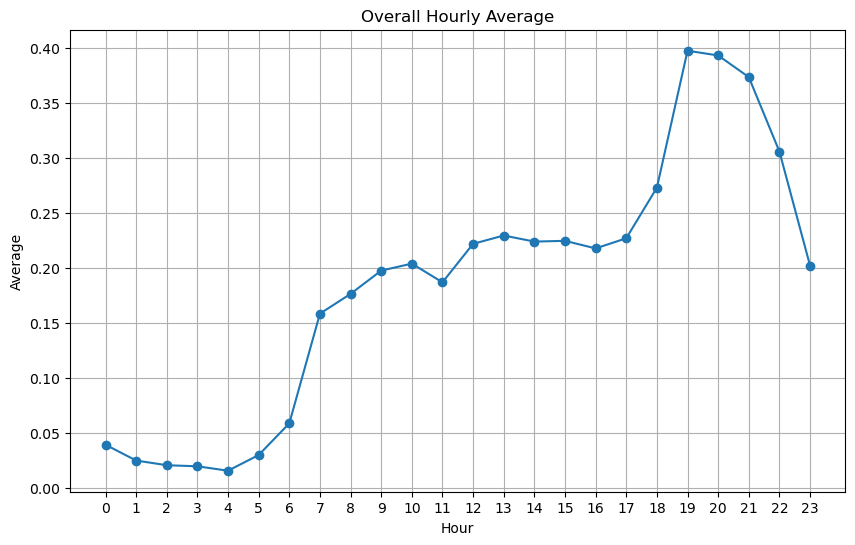

In [252]:
import matplotlib.pyplot as plt
hours = list(overall_hourly_avg.keys())
averages = list(overall_hourly_avg.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(hours, averages, marker='o', linestyle='-')
plt.title('Overall Hourly Average')
plt.xlabel('Hour')
plt.ylabel('Average')
plt.xticks(range(24))  # Set x-axis ticks to show all hours
plt.grid(True)
plt.show()



